In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [3]:


#column headers for the dataset
data_cols = ['user id','movie id','rating','timestamp']
item_cols = ['movie id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance ','Sci-Fi','Thriller','War' ,'Western']
user_cols = ['user id','age','gender','occupation','zip code']

#importing the data files onto dataframes 
users = pd.read_csv('Downloads/ml-100k/u.user', sep='|', names=user_cols, encoding='latin-1')
item = pd.read_csv('Downloads/ml-100k/u.item', sep='|', names=item_cols, encoding='latin-1')
data = pd.read_csv('Downloads/ml-100k/u.data', sep='\t', names=data_cols, encoding='latin-1')

In [4]:
data.shape

(100000, 4)

In [5]:
#euclidean_distances_allusers = euclidean_distances(allusers_matrix)

In [6]:
test_data = (data)[:100]

In [7]:
uall = (data.sort_values('user id'))

In [8]:
uall.tail()

,user id,movie id,rating,timestamp
96823,943,427,4,888639147
70902,943,12,5,888639093
84518,943,284,2,875502192
72321,943,62,3,888640003
70713,943,210,4,888639147


In [9]:
utrain = (data.sort_values('user id'))[:99832]

utest = (data.sort_values('user id'))[99833:]
uall = (data.sort_values('user id'))

utrain = utrain.as_matrix(columns = ['user id', 'movie id', 'rating'])
#print(utrain)

utest = utest.as_matrix(columns = ['user id', 'movie id', 'rating'])
#print(utest)
uall = uall.as_matrix(columns = ['user id', 'movie id', 'rating'])



In [10]:
uall.shape

(100000, 3)

In [11]:
uall

array([[  1,  55,   5],
       [  1, 203,   4],
       [  1, 183,   5],
       ...,
       [943, 284,   2],
       [943,  62,   3],
       [943, 210,   4]])

In [13]:
utility_matrix = np.zeros((943+1, 1682+1))

In [14]:
for u in uall:

    utility_matrix[u[0]][u[1]] = u[2]
    
    

In [15]:
similarity_scores = np.zeros((944,944))

In [16]:

from scipy.stats import pearsonr
for x in range(utility_matrix.shape[0]):
    for y in range(utility_matrix.shape[0]):
        
        if x == y:
            continue
        
        score = euclidean_distances([utility_matrix[x]],[utility_matrix[y]])
        
        similarity_scores[x][y] = score

In [54]:

from scipy.stats import pearsonr
for x in range(utility_matrix.shape[0]):
    for y in range(utility_matrix.shape[0]):
        
        if x == y:
            continue
        
        score = cosine_similarity([utility_matrix[x]],[utility_matrix[y]])
        
        similarity_scores[x][y] = score

In [56]:
test_matrix = test_data.as_matrix(columns = ['user id', 'movie id'])

In [57]:
test_labels = test_data.as_matrix(columns = ['rating'])

In [58]:
true_labels = []
for t in test_labels:
    true_labels.append(t[0])


In [59]:
def get_label(similar_user_id,test_user_movie_id):
    
    return utility_matrix[similar_user_id][test_user_movie_id]

In [60]:
def get_predicted_label(targets,true_label):
    new_targets = []
    for i in range(len(targets)):
        if targets[i] == 0.0:
            continue
        else:
            new_targets.append(targets[i])
            
    targets = new_targets
    if len(new_targets) == 0:
        return 0.0
    freq = Counter(new_targets)
    mc = freq.most_common()
    #print("mc",mc)
    maxv = mc[0][1]
    
    common_list = []
    for e in mc:
        if e[1] == maxv:
            common_list.append(e[0])
    if true_label in common_list:
        return true_label
    
    return common_list[0]

In [61]:
from collections import Counter
from sklearn.metrics import accuracy_score
import numpy

def KNN_euclidean(similarity_matrix,k):
    predictions = []
    update_labels = []
    for x in range(test_matrix.shape[0]):
        i = test_matrix[x]
        #print("user:",i)
        user = i[0]
        neighbors = []
        targets = []
        test_user_movie_id = i[1]
        neighbors = numpy.argsort(-similarity_matrix[i[0]])
        wt = 0
        den = 0
        for p in range(0,k):
            similar_user_id = neighbors[p]
            
            label = get_label(similar_user_id,test_user_movie_id)
            #print("label",label)
            targets.append(label)
            if label != 0.0:
                wt += label*similarity_matrix[i[0]][similar_user_id]
                den += similarity_matrix[i[0]][similar_user_id]
        if den == 0:
            predicted_label = 0.0
        else:
            predicted_label = int(wt/den) 
        #print("predicted label",predicted_label)
        #print("target",targets)
        #predicted_label = get_predicted_label(targets,float(true_labels[x]))
        
        update_labels.append(true_labels[x])
        predictions.append(predicted_label)
#         if predicted_label != 0.0:
#             update_labels.append(true_labels[x])
#             predictions.append(predicted_label)
    return predictions,update_labels

In [74]:
from sklearn.metrics import mean_squared_error

ks = []
rmses = []
for i in range(1,50):
    
    predictions,update_labels = KNN_euclidean(similarity_scores,i)
    #print(accuracy_score(update_labels,numpy.asarray(predictions))*100)
    rmse = math.sqrt(mean_squared_error(update_labels, predictions))
    ks.append(i)
    rmses.append(rmse)

In [75]:
print(len(rmses))
print(len(ks))

49
49


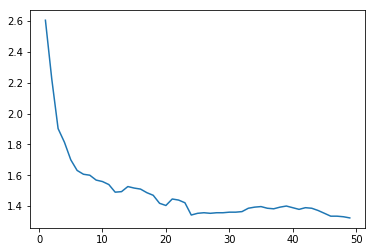

In [76]:

plt.plot(ks,rmses)
plt.show()

In [198]:
import numpy as np
from scipy.stats import pearsonr
x = np.array([ 58295.62187335,  45420.95483714,   3398.64920064,    977.22166306, 5515.32801851,  14184.57621022,  16027.2803392 ,  15313.01865824, 6443.2448182 ])
y = np.array([ 143547.79123381,   22996.69597427,    2591.56411049, 661.93115277,    8826.96549102,   17735.13549851, 11629.13003263,   14438.33177173,    6997.89334741])

r,p = pearsonr(x,y)

print("r", r)

print("p", p)

r 0.8310879563921635
p 0.005505396210388271


In [73]:
predictions,update_labels = KNN_euclidean(similarity_scores,20)
rmse = math.sqrt(mean_squared_error(update_labels, predictions))
print(rmse)

1.40356688476182
